In [0]:
import pandas as pd
import numpy as np

In [0]:
data = pd.read_csv(r'/content/test-indicator.csv',dtype=str)
data.head()

Unnamed: 0      DATE  ...    trend_ichimoku_b        momentum_rsi
0          0  20191001  ...  1.0897899999999998                50.0
1          1  20191001  ...  1.0897649999999999                 0.0
2          2  20191001  ...  1.0897649999999999    8.23529411768901
3          3  20191001  ...  1.0897649999999999  51.366906474806555
4          4  20191001  ...  1.0897649999999999   39.40062823666245

[5 rows x 13 columns]

In [0]:
data['DATETIME'] = data['DATE'].map(str)+' '+data['TIME'].map(str)    #Merge date time


In [0]:
data['OPEN'] = pd.to_numeric(data['OPEN'],downcast='float')
data['HIGH'] = pd.to_numeric(data['HIGH'],downcast='float')
data['LOW'] = pd.to_numeric(data['LOW'],downcast='float')                   #changing datatype to respective types
data['CLOSE'] = pd.to_numeric(data['CLOSE'],downcast='float')
data['VOL'] = pd.to_numeric(data['VOL'],downcast='integer')
data['trend_ichimoku_a'] = pd.to_numeric(data['trend_ichimoku_a'],downcast='float')
data['trend_ichimoku_b'] = pd.to_numeric(data['trend_ichimoku_b'],downcast='float')
data['trend_macd'] = pd.to_numeric(data['trend_macd'],downcast='float')
data['volatility_bbh'] = pd.to_numeric(data['volatility_bbh'],downcast='float')
data.shape

(6523, 14)

In [0]:
data.drop(data.columns.difference(['OPEN','HIGH','LOW','CLOSE', 'VOL','DATETIME']), 1, inplace=True)             #Drop useless features
data.head()

OPEN     HIGH      LOW    CLOSE   VOL        DATETIME
0  1.08967  1.09003  1.08955  1.08980  1735   20191001 1500
1  1.08986  1.08993  1.08950  1.08968  4713   20191001 3000
2  1.08967  1.08979  1.08959  1.08969  3037   20191001 4500
3  1.08969  1.08997  1.08958  1.08979  5764  20191001 10000
4  1.08983  1.09002  1.08950  1.08973  6285  20191001 11500

In [0]:
data['OPEN'] = (pd.to_numeric(data['OPEN'],downcast='float') )
data['HIGH'] = (pd.to_numeric(data['HIGH'],downcast='float') )
data['LOW'] = (pd.to_numeric(data['LOW'],downcast='float'))
data['CLOSE'] = (pd.to_numeric(data['CLOSE'],downcast='float'))
#data['trend_macd'] = (pd.to_numeric(data['trend_macd'],downcast='float'))

data['VOL'] = pd.to_numeric(data['VOL'],downcast='integer')                             

In [0]:
data['DATETIME'] = pd.to_datetime(data['DATETIME'], format='%Y%m%d %H%M%S',errors='coerce')        #changing to datetime format
data.head()

OPEN     HIGH      LOW    CLOSE   VOL            DATETIME
0  1.08967  1.09003  1.08955  1.08980  1735 2019-10-01 15:00:00
1  1.08986  1.08993  1.08950  1.08968  4713 2019-10-01 03:00:00
2  1.08967  1.08979  1.08959  1.08969  3037 2019-10-01 04:50:00
3  1.08969  1.08997  1.08958  1.08979  5764 2019-10-01 10:00:00
4  1.08983  1.09002  1.08950  1.08973  6285 2019-10-01 11:50:00

In [0]:
from fbprophet import Prophet
import logging  

logging.getLogger().setLevel(logging.ERROR)

In [0]:
data.rename(columns={'DATETIME':'ds', 'CLOSE':'y'}, inplace=True)             #renaming columns to ds and y for prophet
data.dropna

data.head()

OPEN     HIGH      LOW        y   VOL                  ds
0  1.08967  1.09003  1.08955  1.08980  1735 2019-10-01 15:00:00
1  1.08986  1.08993  1.08950  1.08968  4713 2019-10-01 03:00:00
2  1.08967  1.08979  1.08959  1.08969  3037 2019-10-01 04:50:00
3  1.08969  1.08997  1.08958  1.08979  5764 2019-10-01 10:00:00
4  1.08983  1.09002  1.08950  1.08973  6285 2019-10-01 11:50:00

In [0]:
data = data.dropna(subset=['ds'])


In [0]:
data = data[:-1]
data = data[1:]
                                                      #prediction by prophet
dat = data[['ds', 'y']]
data
prediction_size = 30
train_df = data[:-prediction_size]
m = Prophet()
m.fit(train_df)

In [0]:
future = m.make_future_dataframe(periods=prediction_size)
                                                                                #forecasting for set prediction
forecast = m.predict(future)

In [0]:
forecast.size

122398

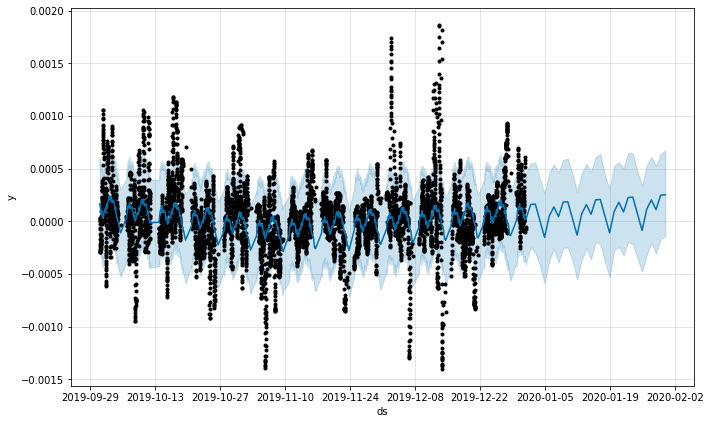

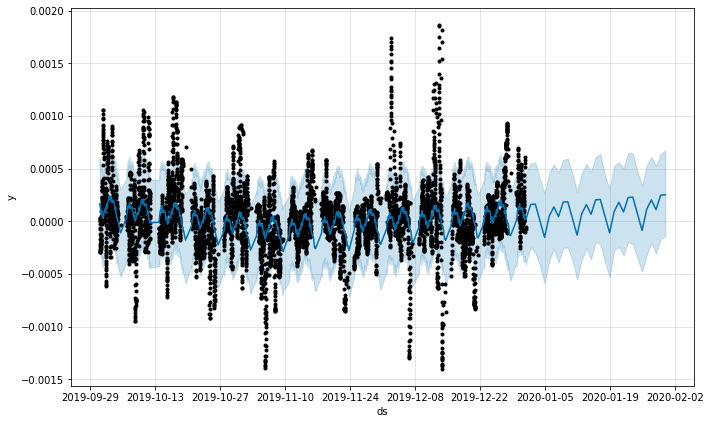

In [0]:
m.plot(forecast)

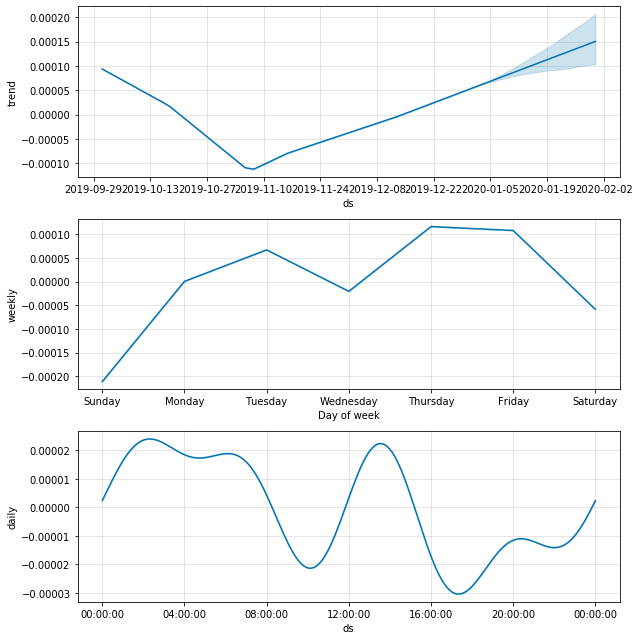

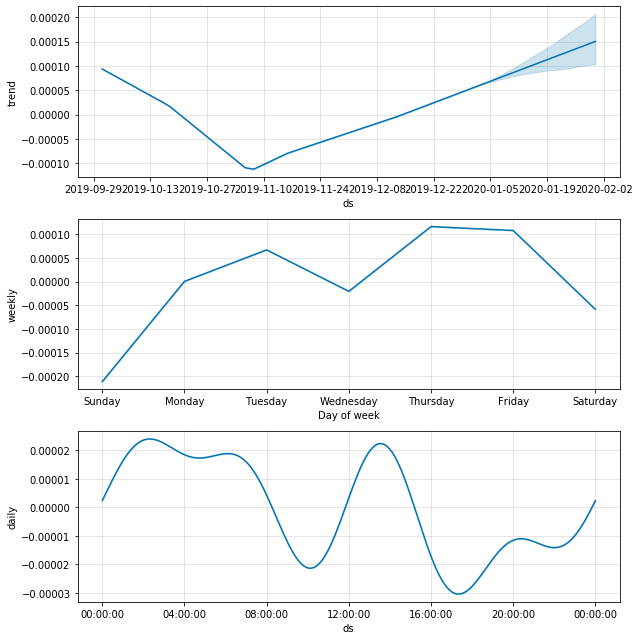

In [0]:
m.plot_components(forecast)

In [0]:
def make_comparison_dataframe(historical, forecast):
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))

In [0]:
cmp_df = make_comparison_dataframe(data, forecast)

cmp_df.head()

yhat  yhat_lower  yhat_upper  ...     LOW        y     VOL
ds                                                     ...                         
2019-10-01 02:45:00  1.089406    1.086855    1.092211  ...  1.0897  1.08980  5718.0
2019-10-01 03:00:00  1.089439    1.087016    1.092061  ...  1.0895  1.08968  4713.0
2019-10-01 03:00:00  1.089439    1.087016    1.092061  ...  1.0897  1.08993  5825.0
2019-10-01 03:00:00  1.089439    1.086918    1.092035  ...  1.0895  1.08968  4713.0
2019-10-01 03:00:00  1.089439    1.086918    1.092035  ...  1.0897  1.08993  5825.0

[5 rows x 8 columns]

In [0]:
data.drop(data.columns.difference(['OPEN','HIGH','LOW','CLOSE', 'VOL','ds','yhat','yhat_lower','yhat_upper','y']), 1, inplace=True)             #Drop useless features
data.head()

OPEN     HIGH      LOW    CLOSE   VOL         y                  ds
3  1.08969  1.08997  1.08958  1.08979  5764 -0.000013 2019-10-01 10:00:00
4  1.08983  1.09002  1.08950  1.08973  6285 -0.000015 2019-10-01 11:50:00
5  1.08971  1.08991  1.08960  1.08982  5845 -0.000010 2019-10-01 13:00:00
6  1.08989  1.08994  1.08960  1.08977  5129 -0.000009 2019-10-01 14:50:00
7  1.08977  1.08984  1.08950  1.08983  5799 -0.000004 2019-10-01 20:00:00

In [0]:
cmp_df.to_csv('/content/close-forecast.csv')

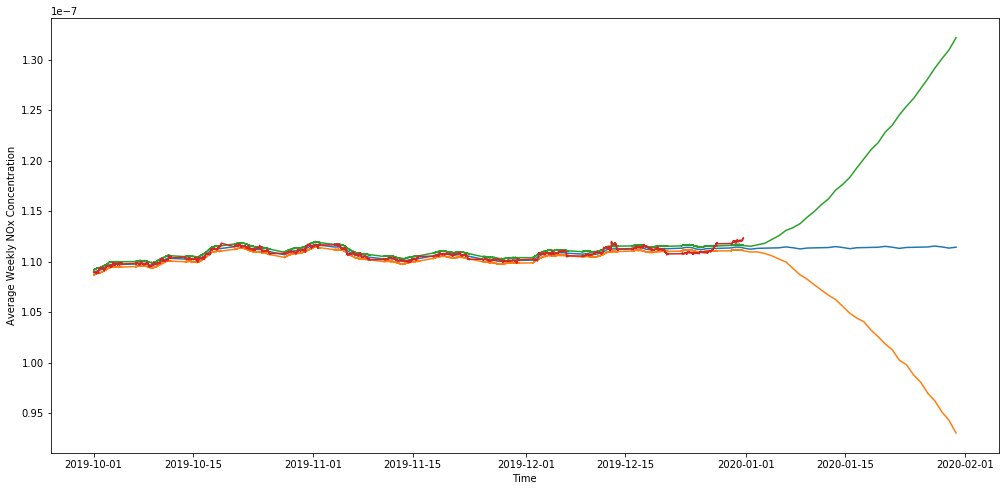

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(17, 8))
plt.plot(cmp_df['yhat'])
plt.plot(cmp_df['yhat_lower'])
plt.plot(cmp_df['yhat_upper'])
plt.plot(cmp_df['y'])
plt.xlabel('Time')
plt.ylabel('Average Weekly NOx Concentration')
plt.grid(False)
plt.show()